In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re
from wordcloud import WordCloud
from collections import Counter
import csv
from matplotlib import rcParams
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import joblib
from nltk.stem.porter import PorterStemmer

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

**Persiapkan Stopwords**

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAMBAGA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
print(stopwords.words('indonesian'))

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

# **Data Pre-processing**

In [5]:
data1_train = pd.read_csv("Data_latih.csv")
data2_train = pd.read_csv("train.csv")
data_uji = pd.read_csv("Data_uji.csv")

In [6]:
print(f'Ukuran data train 1 : {data1_train.shape}')
print(f'Ukuran data train 2 : {data2_train.shape}')
print(f'Ukuran data test  : {data_uji.shape}')

Ukuran data train 1 : (4231, 6)
Ukuran data train 2 : (20800, 5)
Ukuran data test  : (470, 5)


## **Fitur Data**

Fitur pada data 1 yang digunakan pada model adalah bagian judul dan narasi, sedangkan fitur pada data 2 yang digunakan pada model adalah bagian title + author

In [7]:
data1_train.head()

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg


In [8]:
data2_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
print(f'Jumlah missing value data 1 : {data1_train.isnull().sum()}')
print(f'Jumlah missing value data 2 : {data2_train.isnull().sum()}')

Jumlah missing value data 1 : ID                  0
label               0
tanggal             0
judul               0
narasi              0
nama file gambar    0
dtype: int64
Jumlah missing value data 2 : id           0
title      558
author    1957
text        39
label        0
dtype: int64


## **Data Cleansing**

Data 1 tidak memiliki missing value, sedangkan Data 2 dengan missing title perlu dihilangkan dan data dengan missing author perlu diubah menjadi " "

In [10]:
data2_train["author"] = data2_train["author"].fillna('')

In [11]:
data2_train.isnull().sum()

id          0
title     558
author      0
text       39
label       0
dtype: int64

In [12]:
data2_train = data2_train[data2_train['title'].notna()]

In [13]:
data2_train.isnull().sum()

id         0
title      0
author     0
text      39
label      0
dtype: int64

In [14]:
data2_train.shape

(20242, 5)

**Gabung kolom author dengan title dan kolom judul dengan narasi**

In [15]:
data2_train['fitur'] = data2_train['author']+' '+data2_train['title']

In [16]:
data1_train['fitur'] = data1_train['judul']+' '+data1_train['narasi']

**Hapus Kolom yang tidak diperlukan**

In [17]:
data1_train.drop(["ID","tanggal","narasi","nama file gambar","judul"], inplace=True, axis=1)

In [18]:
data2_train.drop(["id","title","author","text"], inplace=True, axis=1)

In [19]:
data1_train.head()

,label,fitur
0,1,Pemakaian Masker Menyebabkan Penyakit Legionna...
1,1,Instruksi Gubernur Jateng tentang penilangan ...
2,1,Foto Jim Rohn: Jokowi adalah presiden terbaik ...
3,1,"ini bukan politik, tapi kenyataan Pak Jokowi b..."
4,1,Foto Kadrun kalo lihat foto ini panas dingin K...


In [20]:
data2_train.head()

,label,fitur
0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,1,Consortiumnews.com Why the Truth Might Get You...
3,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,1,Howard Portnoy Iranian woman jailed for fictio...


**Apply Stopwords**

In [21]:
from nltk.stem.porter import PorterStemmer
port_stem = PorterStemmer()

In [22]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [23]:
data2_train['fitur'] = data2_train['fitur'].apply(stemming)

In [24]:
data2_train.head()

,label,fitur
0,1,darrel lucu hous dem aid even see comey letter...
1,0,daniel j flynn flynn hillari clinton big woman...
2,1,consortiumnew com truth might get fire
3,1,jessica purkiss civilian kill singl us airstri...
4,1,howard portnoy iranian woman jail fiction unpu...


In [25]:
def stemming_ind(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('indonesian')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [26]:
data1_train['fitur'] = data1_train['fitur'].apply(stemming_ind)

**Tampilkan World Cloud**

In [27]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

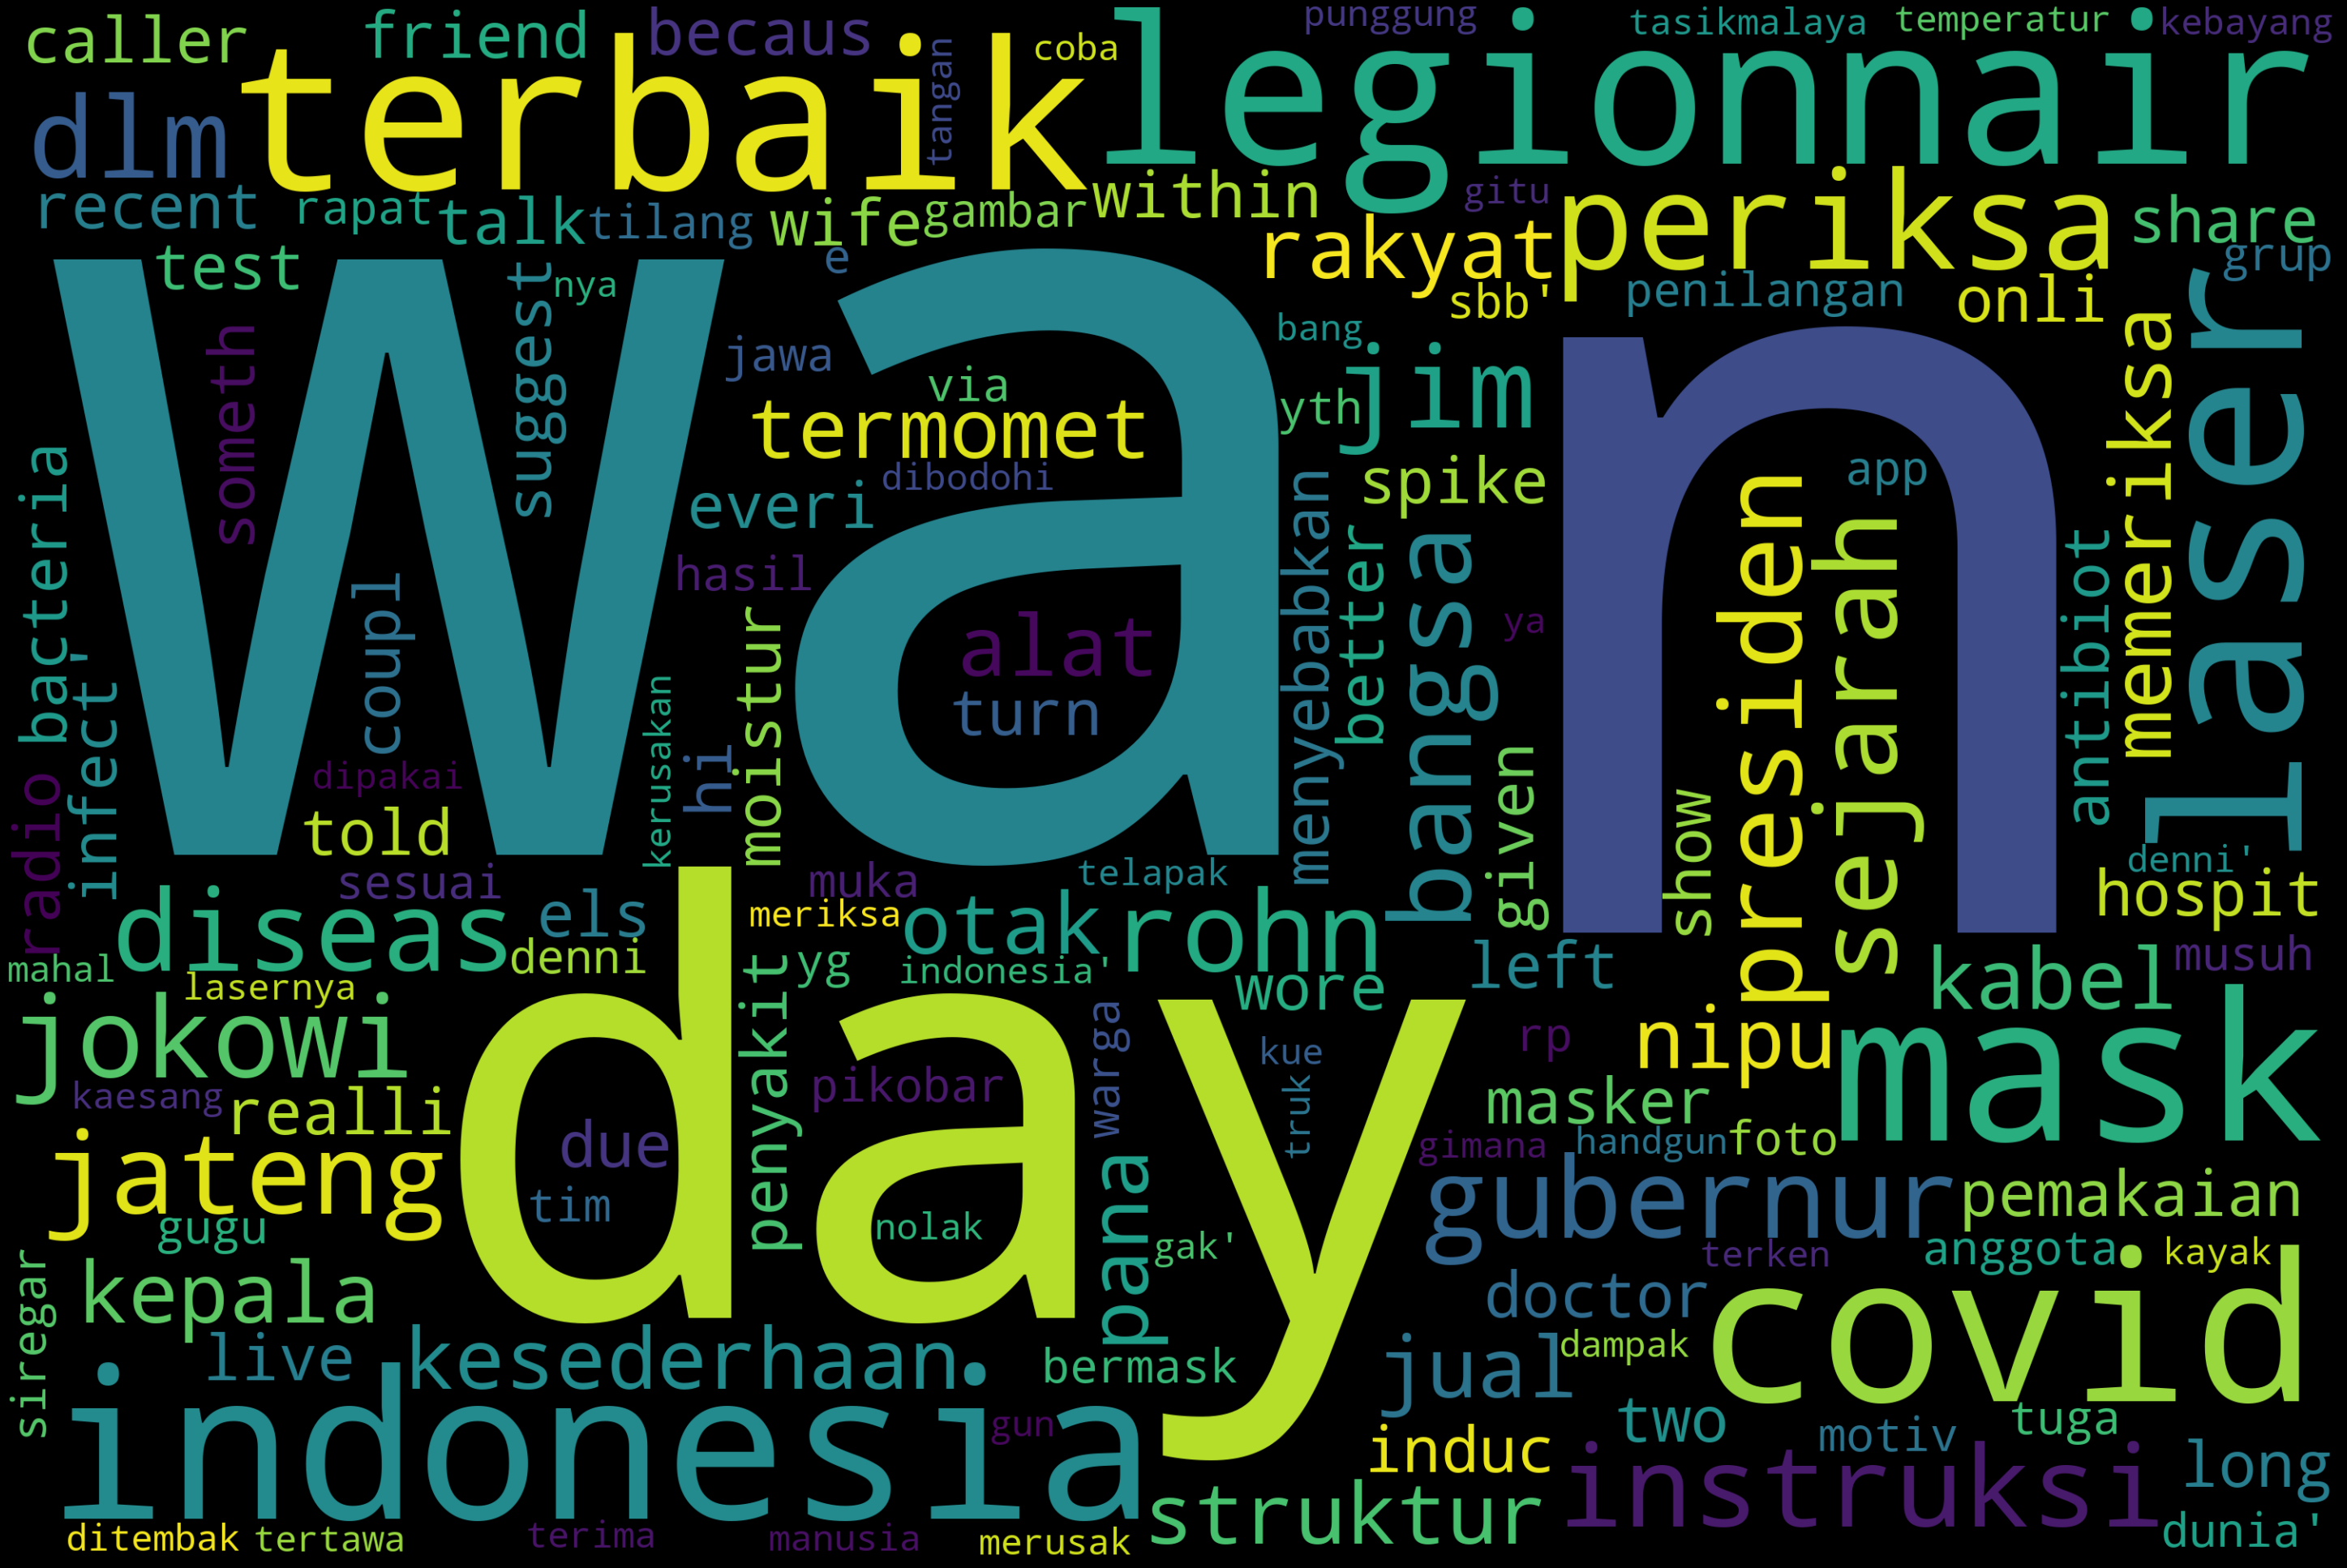

In [28]:
data1 = data1_train['fitur'].values
generate_word_cloud(data1)

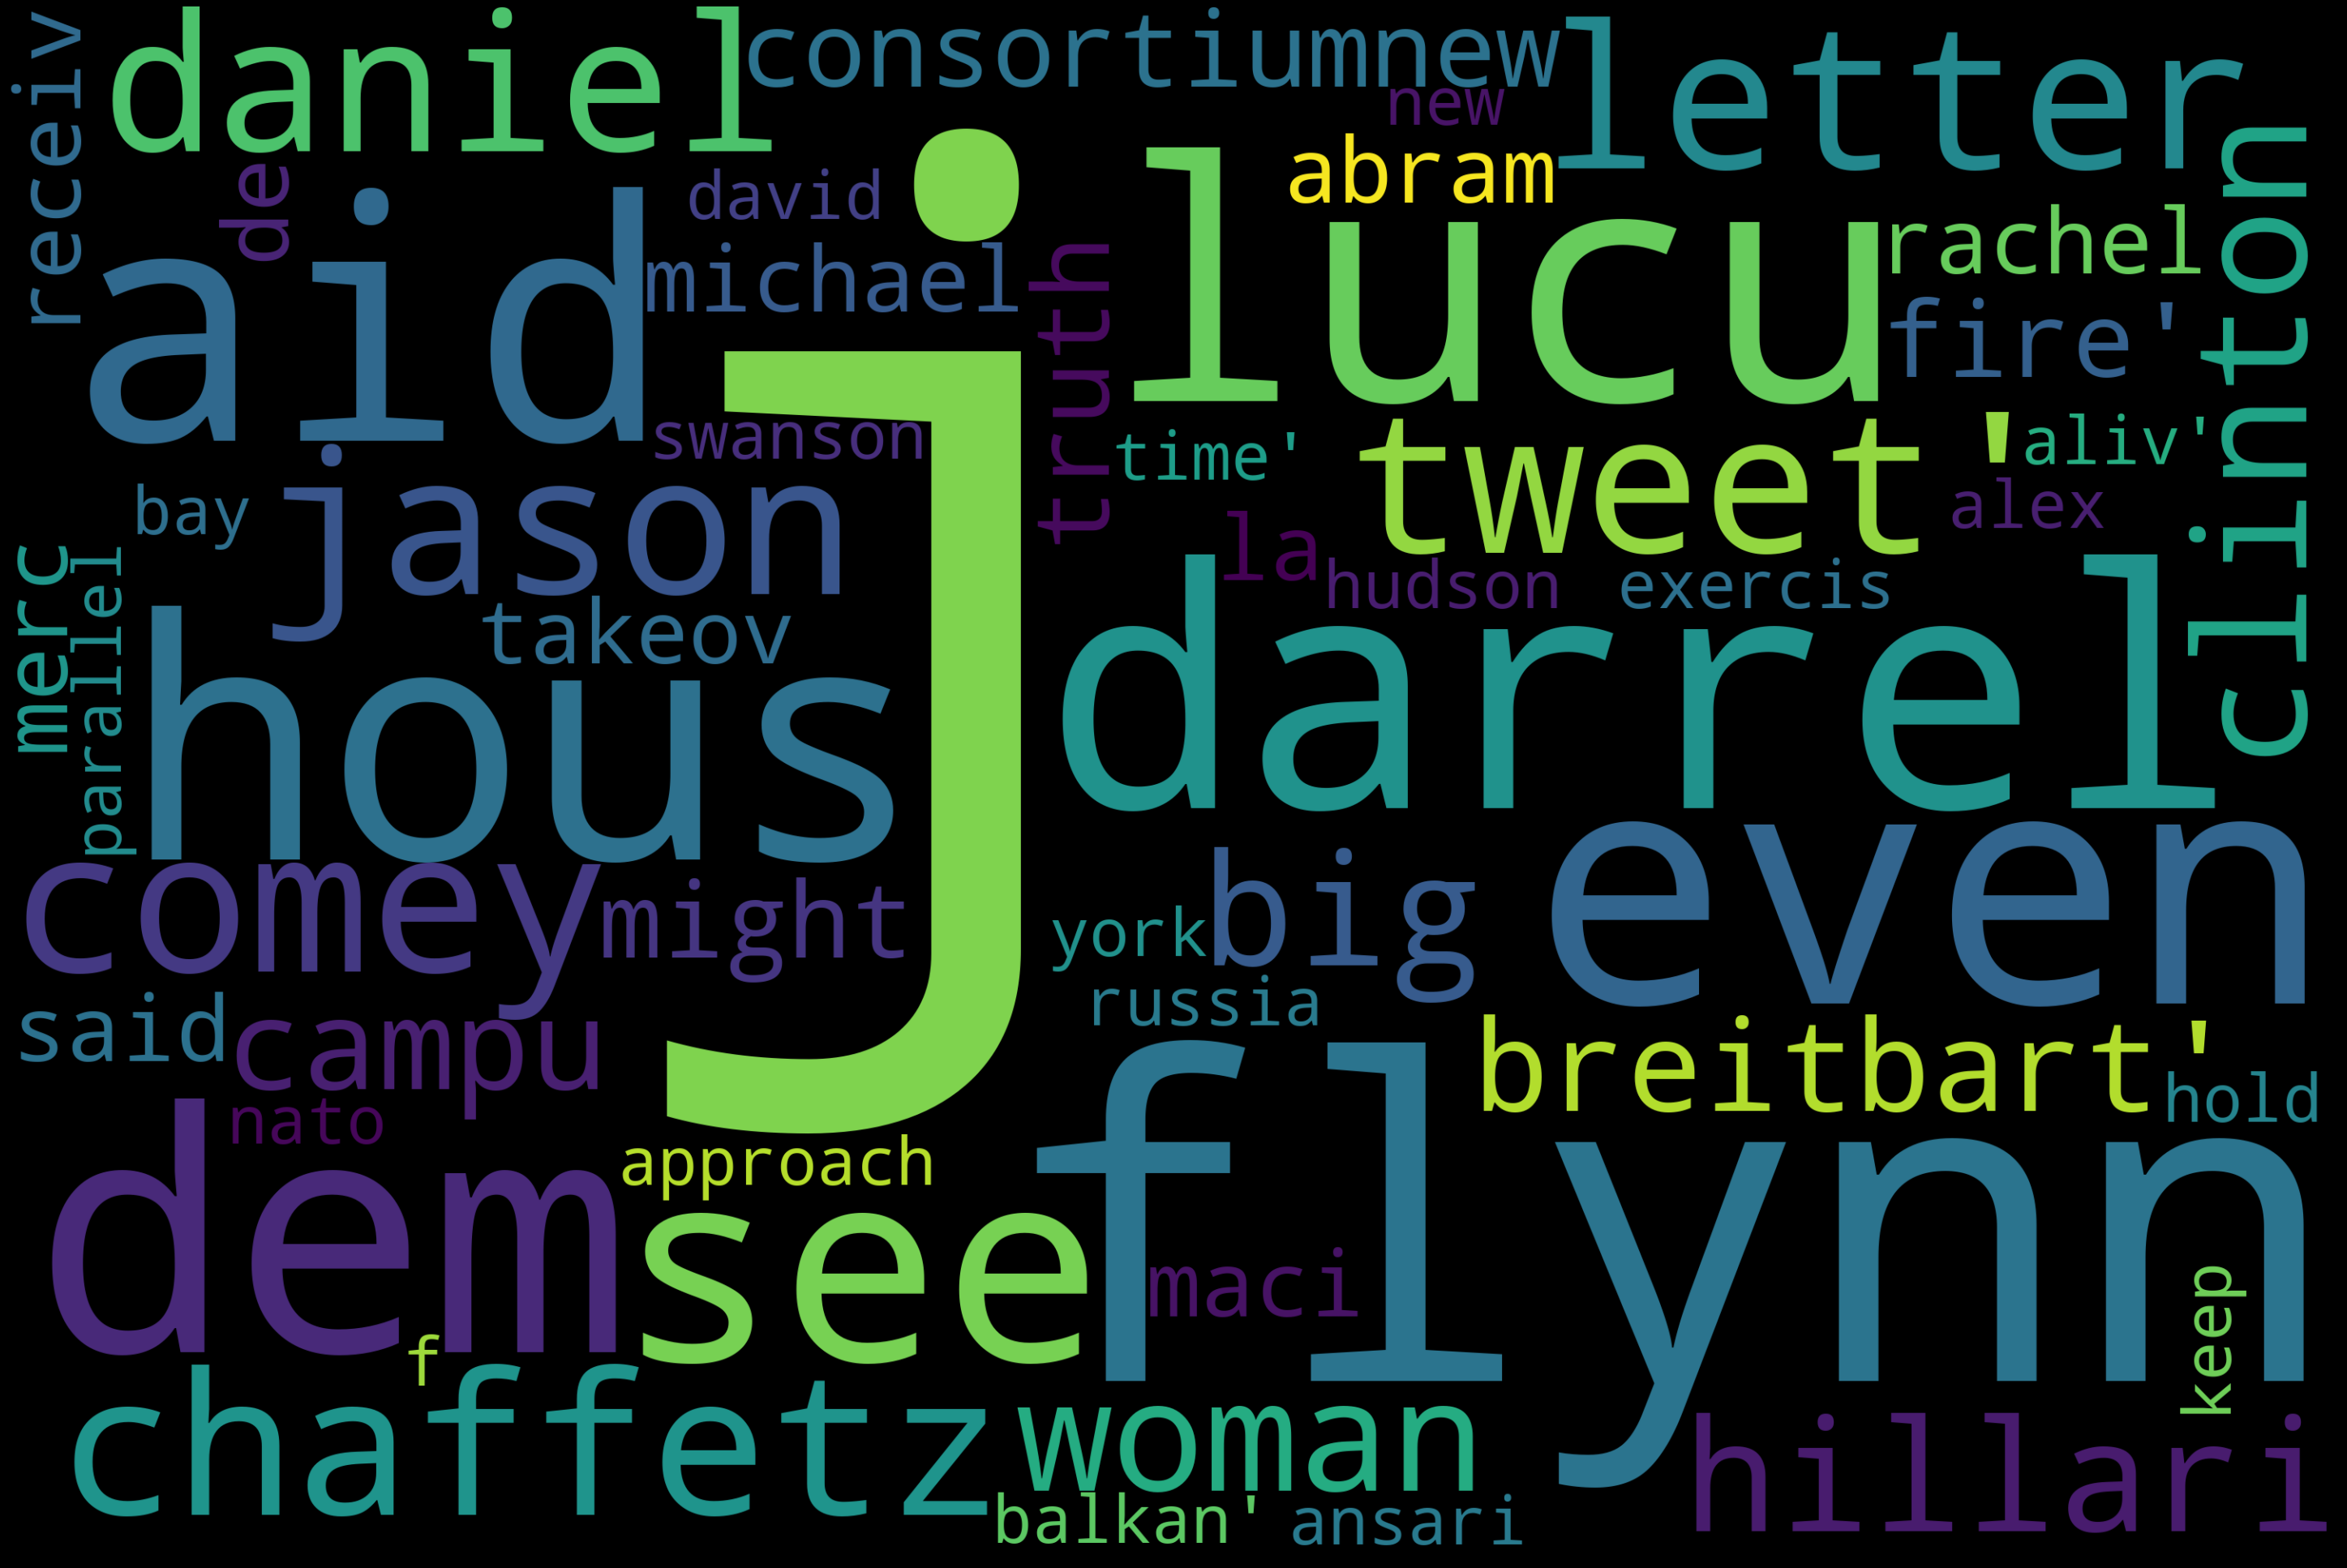

In [29]:
data2 = data2_train['fitur'].values
generate_word_cloud(data2)

**Translate Data**

Data ditranslate secara terpisah melalui google sheet

In [30]:
data1_train_translated = pd.read_csv("data1_train_translatedd.csv")
data1_train_translated.head()

,label,fitur,fitur_translated
0,1,pemakaian masker menyebabkan penyakit legionna...,Use of Masks Cause Legionnait A Caller To A Ra...
1,1,instruksi gubernur jateng penilangan yg bermas...,Instruction of the Governor of Central Java on...
2,1,foto jim rohn jokowi presiden terbaik dlm seja...,Photo of Jim Rohn Jokowi The Best President in...
3,1,politik kenyataan jokowi berhasil memulangkan ...,Politics The reality of Jokowi succeeded in re...
4,1,foto kadrun kalo lihat foto pana dingin kadrun...,photo kadrun if you see a photo of a cold pana...


In [31]:
data1_train_translated.shape

(4231, 3)

In [32]:
data1_train_translated.isnull().sum()

label               0
fitur               0
fitur_translated    0
dtype: int64

In [33]:
data1_train_translated.drop(["fitur"], inplace=True, axis=1)

In [34]:
data1_train_translated = data1_train_translated.rename(columns={"fitur_translated": "fitur"})

In [35]:
data1_train_translated.head()

,label,fitur
0,1,Use of Masks Cause Legionnait A Caller To A Ra...
1,1,Instruction of the Governor of Central Java on...
2,1,Photo of Jim Rohn Jokowi The Best President in...
3,1,Politics The reality of Jokowi succeeded in re...
4,1,photo kadrun if you see a photo of a cold pana...


**Gabungkan Dataset**

In [36]:
data_train_total = data1_train_translated.append(data2_train, ignore_index=True)

In [37]:
data_train_total.shape

(24473, 2)

In [38]:
X = data_train_total['fitur'].values
Y = data_train_total['label'].values

In [39]:
print(X)
print(Y)

['Use of Masks Cause Legionnait A Caller To A Radio Talk Show Recent Share That Hi Wife Wa Hospit N Told She Had Covid N Onli A Coupl Of Day Left To Live A Doctor Friend Suggest She Be Test for Legionnair Diseas BECAUS She Wore The Same Mask Everi Day All Day Long Turn Out It Wa Legionnair Diseas From The Moistur N Bacteria In Her Mask She Wa Given Antibiot N Within Two Day Wa Better What IF These Spike In Covid Are Reali Someth Due To Mask Induc Infect'
 'Instruction of the Governor of Central Java on the face of the face of Rp E Ticket Via Pikobar YTH group member in accordance with the Instruction of the Governor of Javanese Results Gugu Tuga Tuga Covid Central Java SBB'
 'Photo of Jim Rohn Jokowi The Best President in the History of the Indonesian Nation Jokowi The Best President in the History of the Indonesian Nation Jim Rohn Motiv Best World'
 ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold paralle

In [40]:
print(X.shape)
print(Y.shape)

(24473,)
(24473,)


**Ubah Data Menjadi Bentuk Numerik**

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [42]:
print(X)

  (0, 30141)	0.10831330863573967
  (0, 30060)	0.08921489521993538
  (0, 29938)	0.0780451292970898
  (0, 29832)	0.09765723528446181
  (0, 29418)	0.319639385781495
  (0, 28904)	0.0633739222096006
  (0, 28411)	0.07168150321464077
  (0, 28355)	0.0699125541405224
  (0, 27841)	0.07909625767292996
  (0, 27798)	0.1435067732511854
  (0, 27529)	0.10496768790723618
  (0, 27490)	0.07721214888879294
  (0, 27482)	0.06663850026375423
  (0, 27427)	0.07254334756132458
  (0, 27058)	0.07219090917476816
  (0, 26504)	0.08625060625112624
  (0, 25849)	0.0962016409127209
  (0, 25651)	0.08684712555270692
  (0, 24956)	0.06374576983794372
  (0, 24812)	0.4417345246624898
  (0, 24778)	0.07328198158502824
  (0, 23826)	0.10496768790723618
  (0, 22380)	0.09765723528446181
  (0, 22314)	0.11302869621206826
  (0, 22042)	0.08780351982430491
  :	:
  (24470, 23726)	0.2283137003973606
  (24470, 22373)	0.27365467778425384
  (24470, 22019)	0.2508440869331485
  (24470, 18618)	0.08535332936617394
  (24470, 17376)	0.178373495068

**Modeling Data**

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2020)

In [44]:
model = LogisticRegression()

In [45]:
model.fit(X_train, Y_train)

LogisticRegression()

In [46]:
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))

accuracy: 94.77%


In [47]:
from sklearn.metrics import f1_score

print("F1 Score Valid Data : {}%".format(round(f1_score(Y_test, prediction)*100,2)))

F1 Score Valid Data : 95.38%


**Membuat Input Data**

In [48]:
input_berita = input()

Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbar


In [49]:
input_berita = [input_berita]
input_berita = vectorizer.transform(input_berita)
predict = model.predict(input_berita)


print(predict)

if (predict[0]==0):
  print('HOAX not detected !!')
else:
  print('HOAX Detected !!')

[1]
HOAX Detected !!


In [50]:
input_berita2 = input()

Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times


In [51]:
input_berita2 = [input_berita2]
input_berita2 = vectorizer.transform(input_berita2)
predict = model.predict(input_berita2)


print(predict)

if (predict[0]==0):
  print('HOAX not detected !!')
else:
  print('HOAX Detected !!')

[0]
HOAX not detected !!


**Mengeksport Model dan Vectorizer**

In [52]:
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']

In [53]:
filename = 'vectorizer.sav'
joblib.dump(vectorizer, filename)

['vectorizer.sav']